# Demo 0

Comparision of images when only the first few DCTs are retained.

In [1]:
import numpy as np

from scipy.fft import dctn, idctn
from matplotlib import pyplot as plt
from matplotlib import pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 12)

In [2]:
im = plt.imread("../images/earth-1024.png")

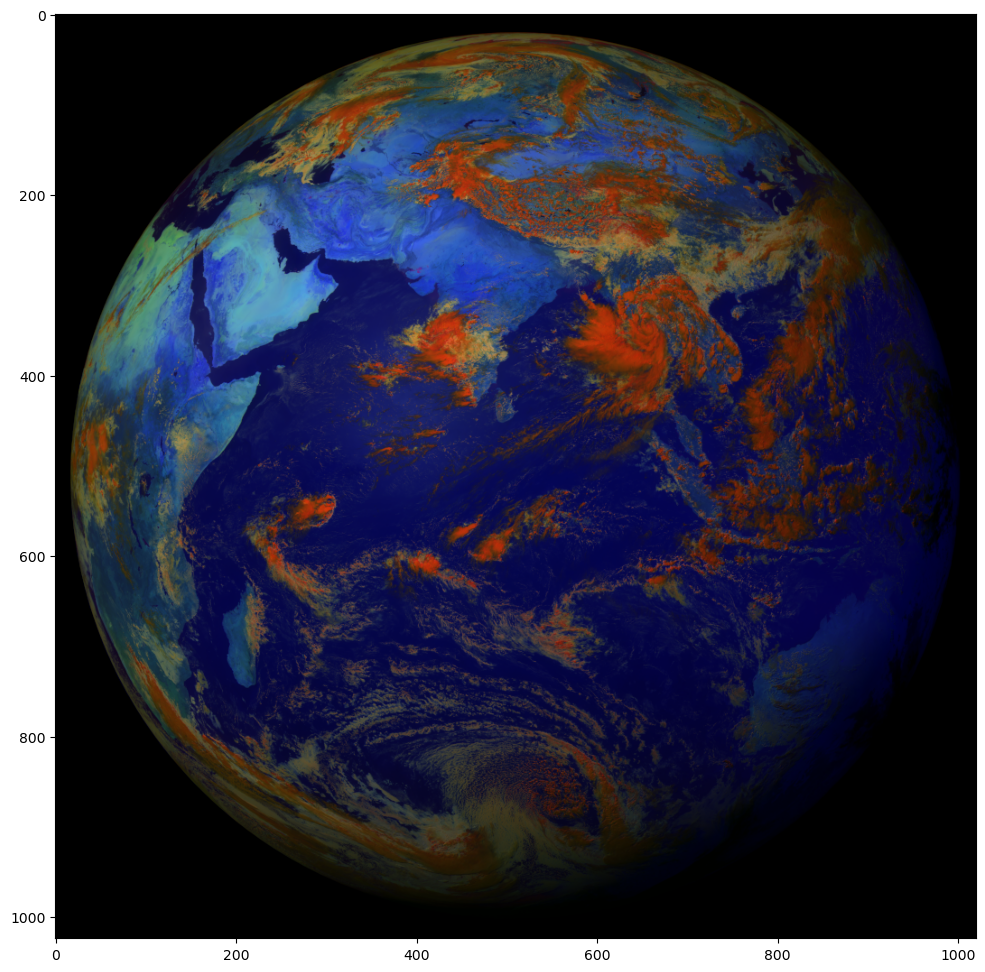

In [3]:
plt.figure()
plt.imshow(im)

In [4]:
# Make image greyscale
im = (im[:,:,0] + im[:,:,1] + im[:,:,2])/3

# Make image dimensions multiples of 8
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

# Convert image from 0-1 float to 0-255 uint8
# This is optional. Comment out to have lossless round trip.
if im.dtype == np.float32:
    im = np.rint(im * 255/im.max()).astype(np.uint8)

Text(0.5, 1.0, 'uint8 image in graymap')

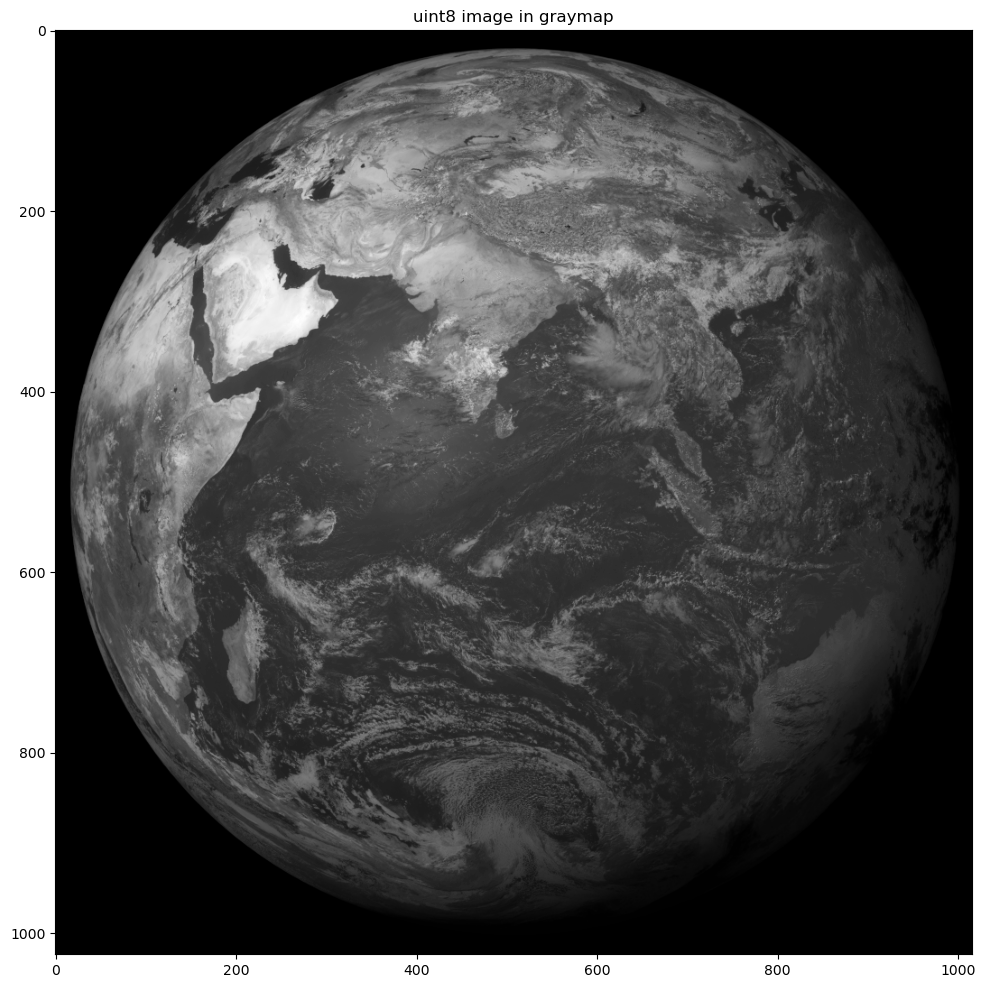

In [5]:
plt.figure()
plt.imshow(im, cmap='gray')
plt.title("uint8 image in graymap")

In [6]:
dct_mask = np.zeros((8, 8))

dct_mask = np.array([
    [1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
])

In [7]:
dct = np.zeros(im.shape)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        dct[i:(i+8),j:(j+8)] = dctn(im[i:(i+8), j:(j+8)], axes=[0, 1], norm='ortho') * dct_mask

print(dct.min())
print(dct.max())


-438.15942519068335
2009.5000000000005


Text(0.5, 1.0, '8x8 DCTs of the image')

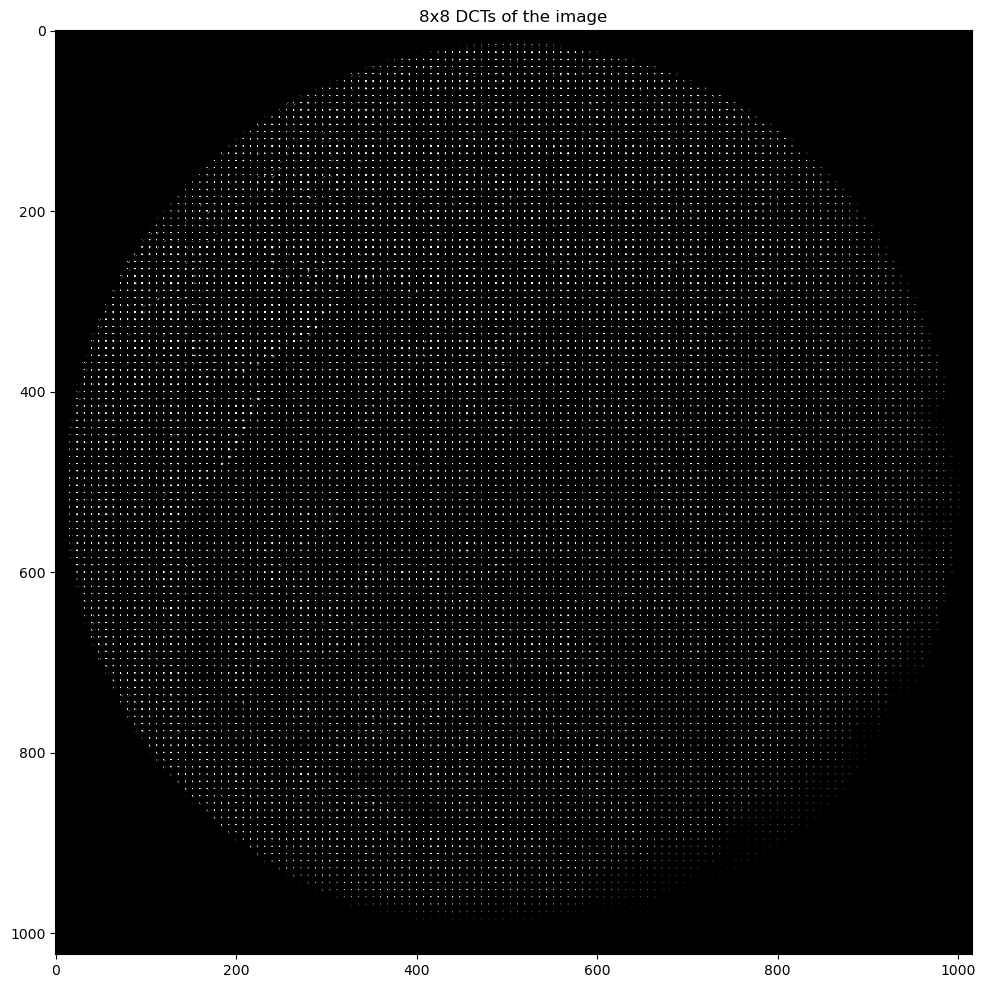

In [8]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.08, vmin=0)
plt.title("8x8 DCTs of the image")

In [9]:
image_dct = np.zeros(im.shape)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        image_dct[i:(i+8),j:(j+8)] = idctn(dct[i:(i+8), j:(j+8)], axes=[0, 1], norm='ortho')

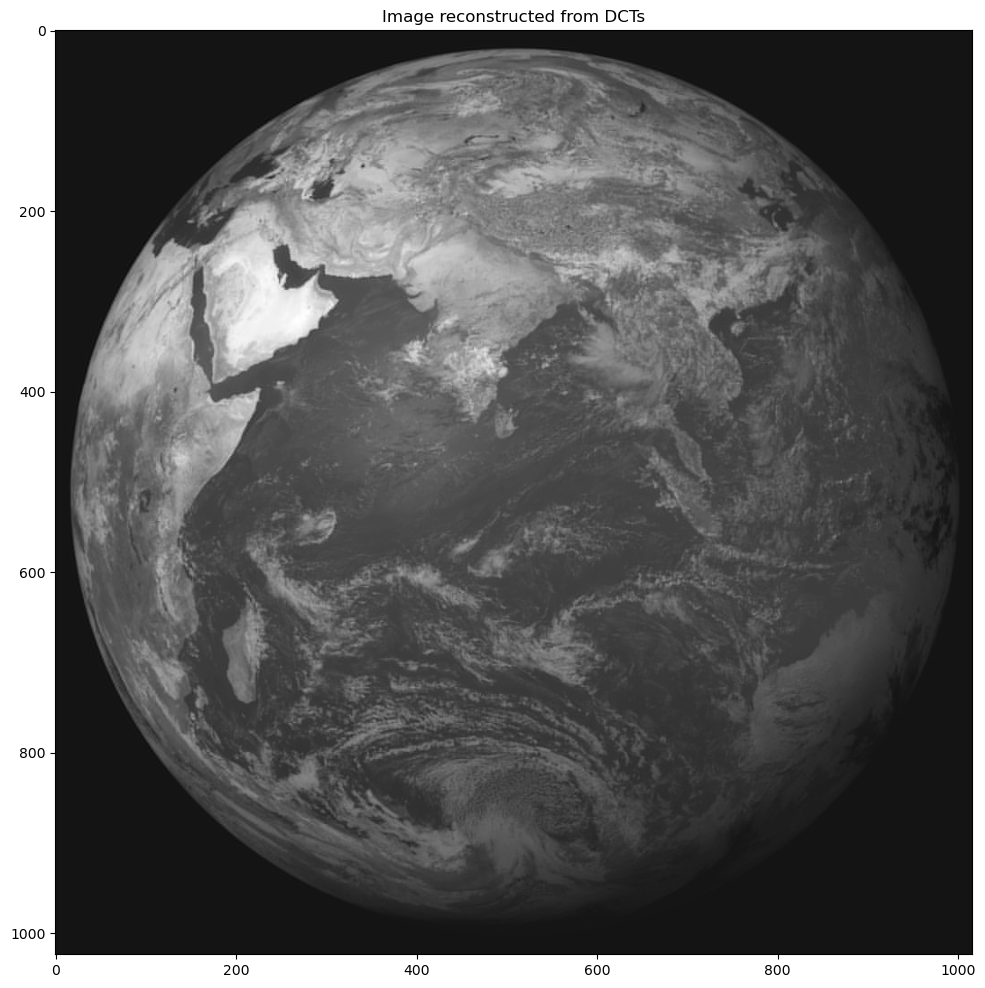

In [10]:
plt.figure()
plt.imshow(image_dct, cmap='gray')
plt.title("Image reconstructed from DCTs")

plt.imsave(f'dct_rec.png', image_dct, cmap='gray')

Text(0.5, 1.0, 'Comparison: Image and Image_DCT')

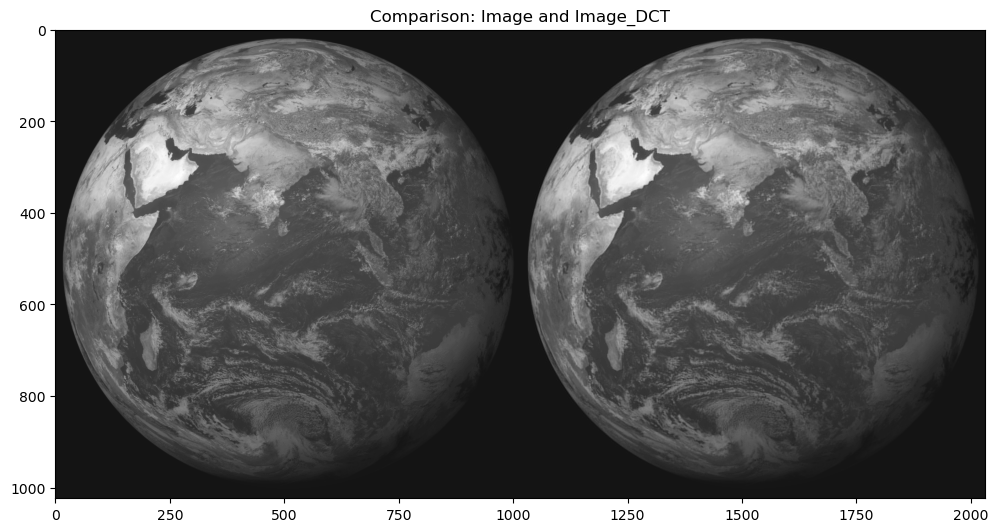

In [11]:
plt.figure()
plt.imshow( np.hstack( (im, image_dct) ), cmap='gray')
plt.title("Comparison: Image and Image_DCT" )